In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
# loadtxt() 이용해서 diabetes.csv 읽어들임

import numpy as np

try:

    loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

    x_data = loaded_data[ :, 0:-1]
    t_data = loaded_data[ :, [-1]]

    print(x_data.shape, t_data.shape)

except Exception as err:

    print(str(err))

(759, 8) (759, 1)


In [16]:
# Deep Learning 을 keras 이용하여 생성

model = Sequential()

# 노드 16개인 은닉층 생성
model.add(Dense(16, activation='sigmoid', input_shape=(8,)))

model.add(Dense(1, activation='sigmoid'))

In [17]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                144       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [18]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs=500, validation_split=0.2, verbose=2)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/500
19/19 - 1s - loss: 0.7732 - accuracy: 0.3443 - val_loss: 0.7445 - val_accuracy: 0.3553 - 549ms/epoch - 29ms/step
Epoch 2/500
19/19 - 0s - loss: 0.7269 - accuracy: 0.3443 - val_loss: 0.7099 - val_accuracy: 0.3553 - 83ms/epoch - 4ms/step
Epoch 3/500
19/19 - 0s - loss: 0.6975 - accuracy: 0.4514 - val_loss: 0.6882 - val_accuracy: 0.5987 - 80ms/epoch - 4ms/step
Epoch 4/500
19/19 - 0s - loss: 0.6788 - accuracy: 0.6557 - val_loss: 0.6747 - val_accuracy: 0.6447 - 70ms/epoch - 4ms/step
Epoch 5/500
19/19 - 0s - loss: 0.6669 - accuracy: 0.6557 - val_loss: 0.6660 - val_accuracy: 0.6447 - 75ms/epoch - 4ms/step
Epoch 6/500
19/19 - 0s - loss: 0.6591 - accuracy: 0.6557 - val_loss: 0.6605 - val_accuracy: 0.6447 - 73ms/epoch - 4ms/step
Epoch 7/500
19/19 - 0s - loss: 0.6540 - accuracy: 0.6557 - val_loss: 0.6569 - val_accuracy: 0.6447 - 74ms/epoch - 4ms/step
Epoch 8/500
19/19 - 0s - loss: 0.6506 - accuracy: 0.6557 - val_loss: 0.6545 - val_accuracy: 0.6447 - 74ms/epoch - 4ms/step
Epoch 9/500
19

In [19]:
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7721


[0.49567466974258423, 0.7720685005187988]

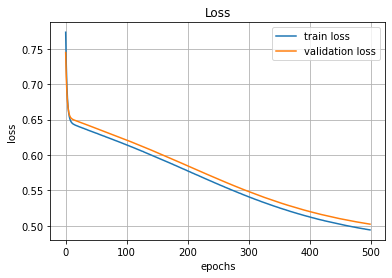

In [20]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

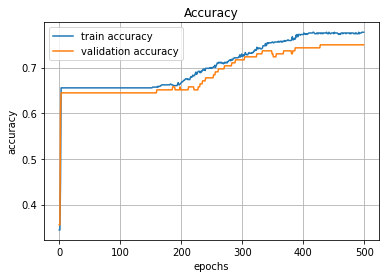

In [21]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()